In [1]:
import pandas as pd
from pyarrow import csv
import numpy as np
import networkx as nx
from functools import reduce
#import sweetviz as sv
import matplotlib.pyplot as plt

import timeit
import time

In [2]:
trainData_file=csv.read_csv('Data/trainData_final_nolinks_day26.csv')
training_df2 =  trainData_file.to_pandas()
training_df2

,Source,Destination,JaccardIndex,ResourceAllocation,AdamicAdar,PreferentialAttachment,CommonNeighborCentrality,Label,in_degree,out_degree,counts,max_duration,min_duration,avg_duration,max_SrcBytes,min_SrcBytes,avg_SrcBytes,max_DstBytes,min_DstBytes,avg_DstBytes
0,ActiveDirectory,Comp000566,0.000993,0.106979,1.570389,140924,5206.4,Missing,4,3197,17.0,243335.0,13949.0,126359.117647,22656.0,1248.0,11796.705882,0.0,0.0,0.0
1,ActiveDirectory,Comp001022,0.001191,0.008405,1.494416,221452,5208.0,Missing,4,3197,3.0,1.0,1.0,1.000000,96.0,96.0,96.000000,0.0,0.0,0.0
2,ActiveDirectory,Comp002524,0.002281,0.009277,2.840069,412706,5216.8,Missing,9,3197,1.0,1.0,1.0,1.000000,96.0,96.0,96.000000,0.0,0.0,0.0
3,ActiveDirectory,Comp003688,0.001786,0.006173,2.173534,281848,5212.8,Missing,2,3197,1.0,26.0,26.0,26.000000,0.0,0.0,0.000000,2287.0,2287.0,2287.0
4,ActiveDirectory,Comp005295,0.002776,0.363384,5.377657,483168,5220.8,Missing,13,3197,2.0,984.0,86.0,535.000000,0.0,0.0,0.000000,2471.0,2411.0,2441.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366347,Comp273343,Comp017911,0.000000,0.000000,0.000000,252,1732.8,NoLink,9,28,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
366348,Comp852778,Comp987487,0.078947,0.000351,0.331175,420,2601.6,NoLink,2,19,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
366349,Comp010016,Comp284265,0.050000,0.000088,0.107098,38,2600.0,NoLink,0,19,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
366350,Comp776638,Comp428151,0.384615,0.002573,1.186201,323,2607.2,NoLink,4,15,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0


In [3]:
testData_file=csv.read_csv('Data/testData_final_nolinks_day26.csv')
testing_df2 =  testData_file.to_pandas()
testing_df2

,Source,Destination,JaccardIndex,ResourceAllocation,AdamicAdar,PreferentialAttachment,CommonNeighborCentrality,Label,in_degree,out_degree,counts,max_duration,min_duration,avg_duration,max_SrcBytes,min_SrcBytes,avg_SrcBytes,max_DstBytes,min_DstBytes,avg_DstBytes
0,ActiveDirectory,Comp003448,0.001699,0.020821,1.893824,172935,5247.6,Missing,5,2025,1.0,28.0,28.0,28.0,0.0,0.0,0.0,2255.0,2255.0,2255.0
1,ActiveDirectory,Comp004355,0.001092,0.001481,1.029108,115290,5243.6,Missing,1,2025,2.0,1.0,1.0,1.0,60.0,60.0,60.0,0.0,0.0,0.0
2,ActiveDirectory,Comp009410,0.002063,0.038536,2.493647,181170,5250.0,Missing,3,2025,1.0,4.0,4.0,4.0,640.0,640.0,640.0,0.0,0.0,0.0
3,ActiveDirectory,Comp014675,0.001578,0.002518,1.511377,123525,5246.8,Missing,1,2025,3.0,29642.0,16122.0,22432.0,1740.0,1020.0,1280.0,0.0,0.0,0.0
4,ActiveDirectory,Comp014941,0.001092,0.003264,1.079179,98820,5243.6,Missing,1,2025,1.0,1.0,1.0,1.0,309.0,309.0,309.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243997,Comp050085,Comp972195,0.000000,0.000000,0.000000,0,0.0,NoLink,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
243998,Comp114983,Comp372203,0.333333,0.000199,0.117335,3,2619.0,NoLink,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
243999,Comp639223,Comp158414,0.000000,0.000000,0.000000,68,1309.1,NoLink,2,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
244000,Comp155068,Comp382098,0.391304,0.002147,1.061073,256,2625.4,NoLink,0,16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X_test, y_test = testing_df2[['JaccardIndex', 'ResourceAllocation','AdamicAdar','PreferentialAttachment',  'CommonNeighborCentrality','counts','in_degree','out_degree','max_duration','min_duration','avg_duration','max_SrcBytes','min_SrcBytes','avg_SrcBytes','max_DstBytes','min_DstBytes','avg_DstBytes']], testing_df2['Label']

model = RandomForestClassifier()
#model.fit(X_train, y_train)

#print(f"Accuracy on the test set: {accuracy_score(y_test, model.predict(X_test))}")

In [5]:
len(training_df2[training_df2["Label"]=="Continuing"])


153676

In [6]:
len(training_df2[training_df2["Label"]=="Missing"])


156371

In [7]:
len(training_df2[training_df2["Label"]=="New"])

36309

In [8]:
len(training_df2[training_df2["Label"]=="NoLink"])

19996

In [9]:
len(testing_df2[testing_df2["Label"]=="Continuing"])

145250

In [10]:
len(testing_df2[testing_df2["Label"]=="Missing"])

44735

In [11]:
len(testing_df2[testing_df2["Label"]=="New"])

34020

In [12]:
TrainTest=[]
TrainTest.append(training_df2)
TrainTest.append(testing_df2)

In [13]:
trainData=training_df2.copy()

In [14]:
train_Cont_df=trainData[trainData["Label"]=="Continuing"]
train_Miss_df=trainData[trainData["Label"]=="Missing"]
train_New_df=trainData[trainData["Label"]=="New"]
train_NoLink_df=trainData[trainData["Label"]=="NoLink"]

In [15]:
# Step 5 Performance Evaluation: 
from sklearn.metrics import classification_report, confusion_matrix

target_names=['Continuing','Missing', 'New','NoLink']
#report_2 = classification_report(y_test, pred, target_names=target_names)
#print(f"Test Score\t {pred}")
#print(report_2)

In [16]:
dfc=train_Cont_df.sample(n = 19000)
dfm=train_Miss_df.sample(n = 19000)
dfn=train_New_df.sample(n = 19000)
dfnl=train_NoLink_df.sample(n = 19000)

In [17]:
trainData_df3=pd.concat([dfc,dfm,dfn,dfnl],ignore_index=True)
X_train_3, y_train_3 = trainData_df3[['JaccardIndex', 'ResourceAllocation','AdamicAdar','PreferentialAttachment', 'CommonNeighborCentrality','counts','in_degree','out_degree','max_duration','min_duration','avg_duration','max_SrcBytes','min_SrcBytes','avg_SrcBytes','max_DstBytes','min_DstBytes','avg_DstBytes']], trainData_df3['Label']
model.fit(X_train_3, y_train_3)
pred = model.predict(X_test)
Accuracy_score=accuracy_score(y_test, pred)

print(f"Accuracy on the test set: {Accuracy_score}")

Accuracy on the test set: 0.8562183916525274


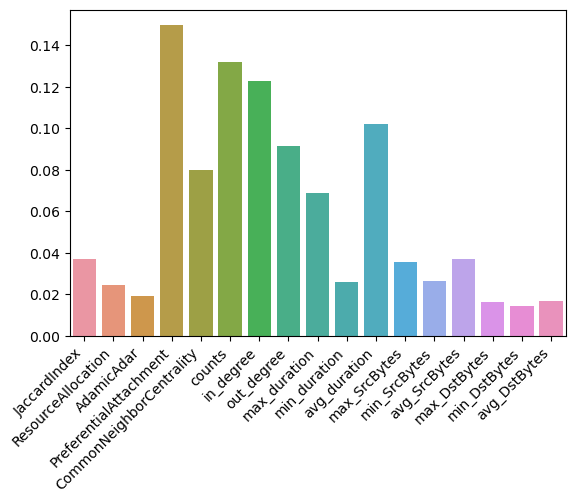

In [18]:
import seaborn as sns
x_labels=model.feature_names_in_
sns.barplot(x=model.feature_names_in_, y=model.feature_importances_)
plt.xticks(rotation=45, ha='right')
plt.subplots_adjust(bottom=0.2)
plt.show()

In [19]:
# Step 5 Performance Evaluation: Confusion Matrix
from sklearn.metrics import confusion_matrix
#print("Sample size for Computer Work   =",(X['Activity']==2).sum())

pred = model.predict(X_test)
cm = confusion_matrix(y_test, pred)

print('Confusion Matrix: \n', cm)

Confusion Matrix: 
 [[124551  20699      0      0]
 [ 12019  32716      0      0]
 [     0      0  31820   2200]
 [     0      0    165  19832]]


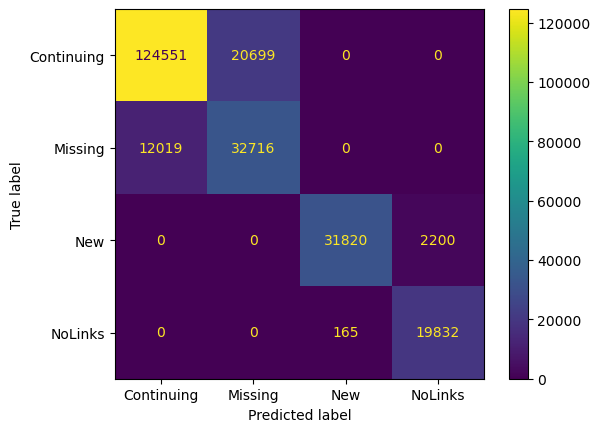

In [20]:
#step 5 Performance Evaluation: Confusion Matrix Visualization
import matplotlib.pyplot as plt

class_names=['Continuing','Missing','New','NoLinks']
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(values_format="d")
#disp.plot()
plt.show()

In [21]:
# Step 5 Performance Evaluation: 
from sklearn.metrics import classification_report, confusion_matrix

target_names=['Continuing','Missing', 'New','NoLinks']
report_2 = classification_report(y_test, pred, target_names=target_names)
#print(f"Test Score\t {pred}")
print(report_2)

              precision    recall  f1-score   support

  Continuing       0.91      0.86      0.88    145250
     Missing       0.61      0.73      0.67     44735
         New       0.99      0.94      0.96     34020
     NoLinks       0.90      0.99      0.94     19997

    accuracy                           0.86    244002
   macro avg       0.85      0.88      0.86    244002
weighted avg       0.87      0.86      0.86    244002



In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X_train, y_train = training_df2[['JaccardIndex', 'ResourceAllocation','AdamicAdar','PreferentialAttachment', 'CommonNeighborCentrality','counts','in_degree','out_degree','max_duration','min_duration','avg_duration','max_SrcBytes','min_SrcBytes','avg_SrcBytes','max_DstBytes','min_DstBytes','avg_DstBytes']], training_df2['Label']
X_test, y_test = testing_df2[['JaccardIndex', 'ResourceAllocation','AdamicAdar','PreferentialAttachment',  'CommonNeighborCentrality','counts','in_degree','out_degree','max_duration','min_duration','avg_duration','max_SrcBytes','min_SrcBytes','avg_SrcBytes','max_DstBytes','min_DstBytes','avg_DstBytes']], testing_df2['Label']

model = RandomForestClassifier()
model.fit(X_train, y_train)

print(f"Accuracy on the test set: {accuracy_score(y_test, model.predict(X_test))}")

Accuracy on the test set: 0.8601404906517159


In [ ]:
# create a for loop for performing the sample 5 times and aggregate the results
Accuracy_List=[]

for i in range(5):
    
    dfc=train_Cont_df.sample(n = 19000)
    dfm=train_Miss_df.sample(n = 19000)
    dfn=train_New_df.sample(n = 19000)
    dfnl=train_NoLink_df.sample(n = 19000)
    
    trainData_df3=pd.concat([dfc,dfm,dfn,dfnl],ignore_index=True)
    X_train_3, y_train_3 = trainData_df3[['JaccardIndex', 'ResourceAllocation','AdamicAdar','PreferentialAttachment', 'CommonNeighborCentrality','counts','in_degree','out_degree','max_duration','min_duration','avg_duration','max_SrcBytes','min_SrcBytes','avg_SrcBytes','max_DstBytes','min_DstBytes','avg_DstBytes']], trainData_df3['Label']
    model.fit(X_train_3, y_train_3)
    pred = model.predict(X_test)
    Accuracy_score=accuracy_score(y_test, pred)
    Accuracy_List.append(Accuracy_score)
    print(f"Accuracy on the test set:{i+1} {Accuracy_score}")
    
    report_2 = classification_report(y_test, pred, target_names=target_names)
    print(f"report{i+1}")
    print(report_2)
    
Avg_Accuracy= np.mean(Accuracy_List)
print(f"Average_Accuracy: {Avg_Accuracy}")


In [ ]:
# create a for loop for performing the sample 5 times and aggregate the results
Accuracy_List=[]

for i in range(5):
    
    dfc=train_Cont_df.sample(n = 50000)
    dfm=train_Miss_df.sample(n = 50000)
    dfn=train_New_df.sample(n = 50000)
    
    trainData_df3=pd.concat([dfc,dfm,dfn],ignore_index=True)
    X_train_3, y_train_3 = trainData_df3[['JaccardIndex', 'ResourceAllocation','AdamicAdar','PreferentialAttachment', 'CommonNeighborCentrality','counts','in_degree','out_degree','max_duration','min_duration','avg_duration','max_SrcBytes','min_SrcBytes','avg_SrcBytes','max_DstBytes','min_DstBytes','avg_DstBytes']], trainData_df3['Label']
    model.fit(X_train_3, y_train_3)
    pred = model.predict(X_test)
    Accuracy_score=accuracy_score(y_test, pred)
    Accuracy_List.append(Accuracy_score)
    print(f"Accuracy on the test set:{i+1} {Accuracy_score}")
    
    report_2 = classification_report(y_test, pred, target_names=target_names)
    print(f"report{i+1}")
    print(report_2)
    
Avg_Accuracy= np.mean(Accuracy_List)
print(f"Average_Accuracy: {Avg_Accuracy}")

In [ ]:
# create a for loop for performing the sample 5 times and aggregate the results
Accuracy_List=[]

for i in range(5):
    
    dfc=train_Cont_df.sample(n = 15000)
    dfm=train_Miss_df.sample(n = 15000)
    dfn=train_New_df.sample(n = 15000)
    
    trainData_df3=pd.concat([dfc,dfm,dfn],ignore_index=True)
    X_train_3, y_train_3 = trainData_df3[['JaccardIndex', 'ResourceAllocation','AdamicAdar','PreferentialAttachment', 'CommonNeighborCentrality','counts','in_degree','out_degree','max_duration','min_duration','avg_duration','max_SrcBytes','min_SrcBytes','avg_SrcBytes','max_DstBytes','min_DstBytes','avg_DstBytes']], trainData_df3['Label']
    model.fit(X_train_3, y_train_3)
    pred = model.predict(X_test)
    Accuracy_score=accuracy_score(y_test, pred)
    Accuracy_List.append(Accuracy_score)
    print(f"Accuracy on the test set:{i+1} {Accuracy_score}")
    
    report_2 = classification_report(y_test, pred, target_names=target_names)
    print(f"report{i+1}")
    print(report_2)
    
Avg_Accuracy= np.mean(Accuracy_List)
print(f"Average_Accuracy: {Avg_Accuracy}")

In [ ]:
# create a for loop for performing the sample 5 times and aggregate the results
for i in range(5):
    dfc=train_Cont_df.sample(n = 30000)
    dfm=train_Miss_df.sample(n = 30000)
    dfn=train_New_df.sample(n = 30000)
    trainData_df3=pd.concat([dfc,dfm,dfn],ignore_index=True)
    X_train_3, y_train_3 = trainData_df3[['JaccardIndex', 'ResourceAllocation','AdamicAdar','PreferentialAttachment', 'CommonNeighborCentrality','counts','in_degree','out_degree','max_duration','min_duration','avg_duration','max_SrcBytes','min_SrcBytes','avg_SrcBytes','max_DstBytes','min_DstBytes','avg_DstBytes']], trainData_df3['Label']
    model.fit(X_train_3, y_train_3)
    print(f"Accuracy on the test set:{i} {accuracy_score(y_test, model.predict(X_test))}")
    

In [ ]:
# create a for loop for performing the sample 5 times and aggregate the results
for i in range(5):
    dfc=train_Cont_df.sample(n = 15000)
    dfm=train_Miss_df.sample(n = 15000)
    dfn=train_New_df.sample(n = 15000)
    trainData_df3=pd.concat([dfc,dfm,dfn],ignore_index=True)
    X_train_3, y_train_3 = trainData_df3[['JaccardIndex', 'ResourceAllocation','AdamicAdar','PreferentialAttachment', 'CommonNeighborCentrality','counts','in_degree','out_degree','max_duration','min_duration','avg_duration','max_SrcBytes','min_SrcBytes','avg_SrcBytes','max_DstBytes','min_DstBytes','avg_DstBytes']], trainData_df3['Label']
    model.fit(X_train_3, y_train_3)
    print(f"Accuracy on the test set:{i} {accuracy_score(y_test, model.predict(X_test))}")
    